# Chapter 3

第三章介绍分类问题。

# Measure

- accuracy
- confusion矩阵
  - precision
  - recall
  - $F_1$ score
  - TPR(recall, sensitivity) & FPR(1-specificity) -> ROC & AUC

# Task
- Binary Classifier
- Multiclass Classification (Binary -> Multiclass: OvA, OvO)
- Multilabel Classification
- Multioutput Classification

# 错误分析
通过混淆矩阵等方式，对出错集中的地方进行分析、处理

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

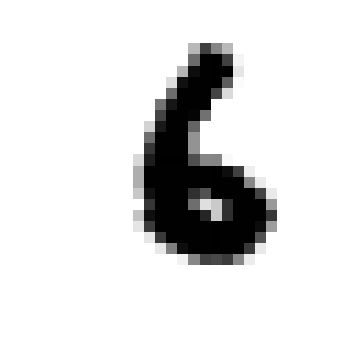

In [6]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36020]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [7]:
y[36020]

6.0

In [8]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
y_train_5 = (y_train == 5)

In [10]:
y_test_5 = (y_test == 5)

In [11]:
y_test_5

array([False, False, False, ..., False, False, False], dtype=bool)

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [13]:
sgd_clf.predict([some_digit])

array([False], dtype=bool)

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9606 ,  0.94325,  0.95765])

In [15]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [16]:
y_train_pred

array([False, False, False, ...,  True,  True, False], dtype=bool)

In [17]:
y_train_pred.shape

(60000,)

In [18]:
X_train.shape

(60000, 784)

In [19]:
y_train_5.shape

(60000,)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52752,  1827],
       [  943,  4478]], dtype=int64)

In [21]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [22]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.71022997620935768

In [23]:
recall_score(y_train_5, y_train_pred)

0.82604685482383322

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.76377281255330043

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-251357.27759558])

In [26]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")
y_scores[:,1]

array([ -206235.66313742, -1661107.97593497,  -387010.19435399, ...,
         244604.92141961,     2046.40122798,   -84736.71709599])

In [27]:
from sklearn.metrics import precision_recall_curve 
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores[:,1])

In [28]:
recalls.shape

(59822,)

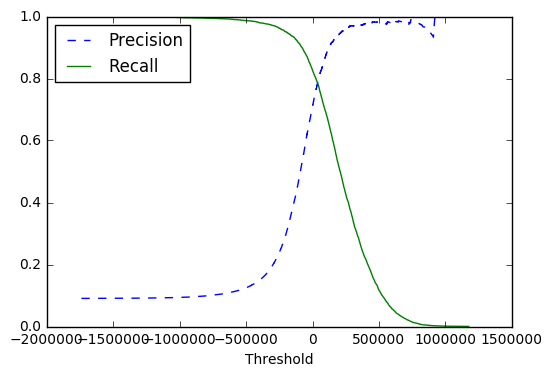

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


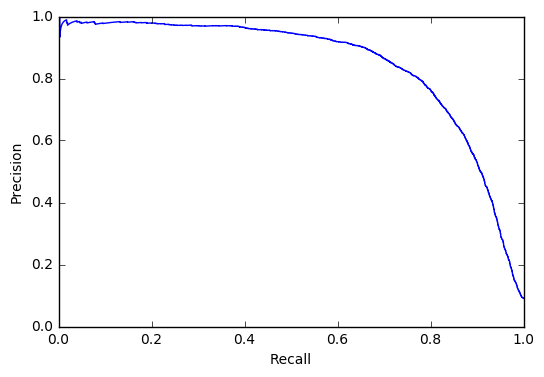

In [30]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_precision_vs_recall(precisions, recalls)
plt.show()

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores[:,1])

F:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


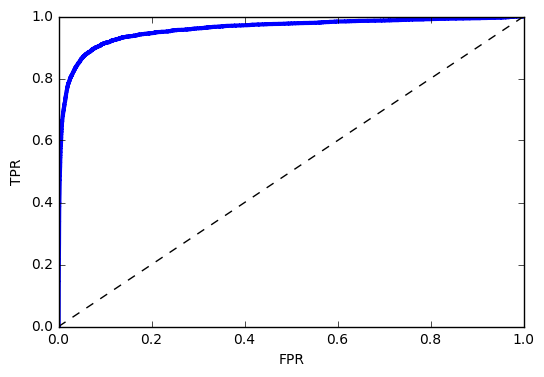

In [32]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, label=label, linewidth=3)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores[:,1])

0.95996568916978253

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

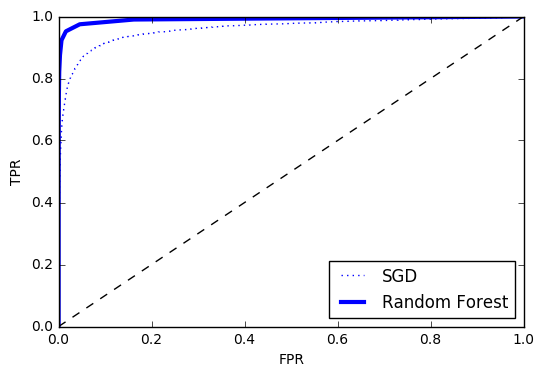

In [35]:
y_scores_forest = y_probas_forest[:,1]
plt.plot(fpr, tpr,"b:",label="SGD")
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plot_roc_curve(fpr_forest, tpr_forest,label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [36]:
roc_auc_score(y_train_5, y_scores_forest)

0.99125015256980786

In [37]:
y_predict_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_predict_forest)

0.98451669984516699

In [38]:
recall_score(y_train_5, y_predict_forest)

0.82106622394392181

In [39]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [40]:
sgd_clf.predict([some_digit])

array([ 6.])

In [41]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [42]:
some_digit_scores

array([[-1038603.38304902,  -354753.84859137,  -219752.37497803,
         -444571.05027403,  -643843.207985  ,  -251357.27759558,
          231426.63524068, -1019205.06709347,  -387281.72887428,
         -604971.53144819]])

In [43]:
np.argmax(some_digit_scores)

6

In [44]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

F:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ 6.])

In [45]:
len(ovo_clf.estimators_)

45

In [46]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([ 6.])

In [47]:
y_train[:10]

array([ 6.,  2.,  2.,  4.,  7.,  6.,  2.,  0.,  3.,  5.])

In [48]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]])

In [49]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.85442911,  0.81114056,  0.84977747])

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring = "accuracy")

array([ 0.91046791,  0.91264563,  0.90803621])

In [51]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5731,    3,   24,   12,   13,   44,   44,    8,   39,    5],
       [   1, 6481,   43,   30,    6,   47,    7,   11,  105,   11],
       [  52,   39, 5323,   97,   89,   26,  101,   57,  157,   17],
       [  43,   41,  137, 5329,    3,  240,   37,   57,  148,   96],
       [  24,   28,   32,    9, 5371,   12,   53,   29,   90,  194],
       [  68,   40,   36,  180,   74, 4616,  111,   26,  172,   98],
       [  30,   23,   48,    2,   47,   89, 5638,    4,   37,    0],
       [  25,   20,   70,   23,   58,   11,    6, 5817,   16,  219],
       [  48,  154,   71,  155,   17,  157,   53,   26, 5036,  134],
       [  46,   33,   25,   87,  152,   27,    2,  207,   89, 5281]], dtype=int64)

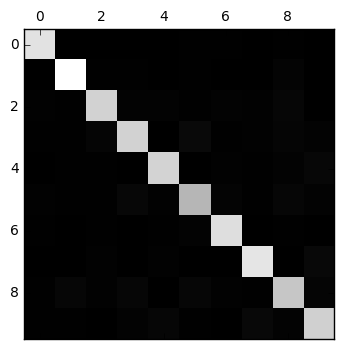

In [52]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [53]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [54]:
row_sums

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]], dtype=int64)

In [55]:
norm_conf_mx

array([[  9.67583995e-01,   5.06500084e-04,   4.05200068e-03,
          2.02600034e-03,   2.19483370e-03,   7.42866790e-03,
          7.42866790e-03,   1.35066689e-03,   6.58450110e-03,
          8.44166807e-04],
       [  1.48323939e-04,   9.61287452e-01,   6.37792940e-03,
          4.44971818e-03,   8.89943637e-04,   6.97122516e-03,
          1.03826758e-03,   1.63156333e-03,   1.55740136e-02,
          1.63156333e-03],
       [  8.72776099e-03,   6.54582075e-03,   8.93420611e-01,
          1.62806311e-02,   1.49378986e-02,   4.36388050e-03,
          1.69519973e-02,   9.56696878e-03,   2.63511245e-02,
          2.85330648e-03],
       [  7.01353776e-03,   6.68732670e-03,   2.23454575e-02,
          8.69189366e-01,   4.89316588e-04,   3.91453270e-02,
          6.03490458e-03,   9.29701517e-03,   2.41396183e-02,
          1.56581308e-02],
       [  4.10818213e-03,   4.79287915e-03,   5.47757617e-03,
          1.54056830e-03,   9.19376926e-01,   2.05409106e-03,
          9.07223554e-03

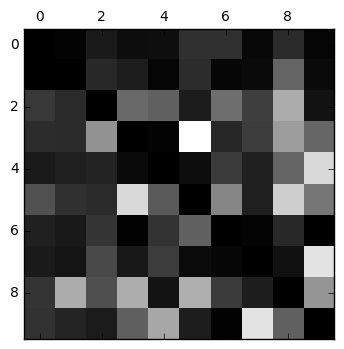

In [56]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

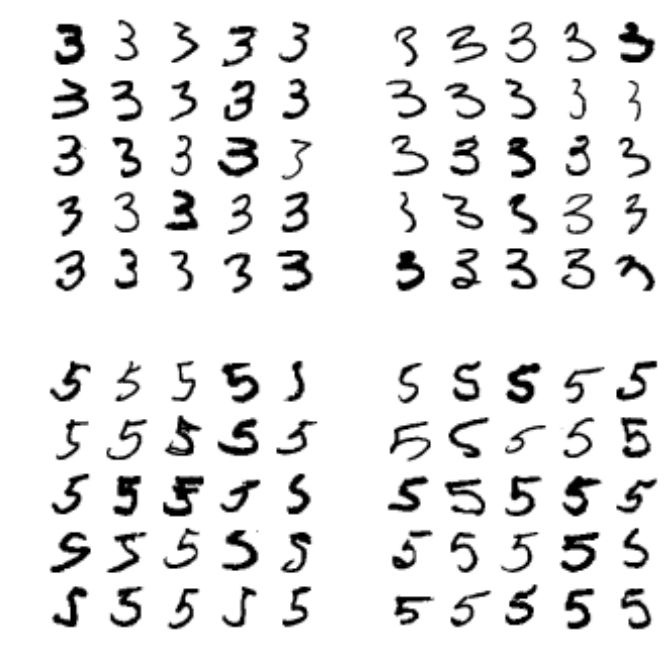

In [62]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

cl_a, cl_b = 3,5
X_aa = X_train[ (y_train == cl_a) & (y_train_pred == cl_a) ]
X_ab = X_train[ (y_train == cl_a) & (y_train_pred == cl_b) ]
X_bb = X_train[ (y_train == cl_b) & (y_train_pred == cl_b) ]
X_ba = X_train[ (y_train == cl_b) & (y_train_pred == cl_a) ]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

In [63]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
knn_clf.predict([some_digit])

array([[False, False]], dtype=bool)

In [69]:
sgd_clf.predict([some_digit])

array([ 6.])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")